<a href="https://colab.research.google.com/github/mmishra1092/Credit-Card-Default-Prediction/blob/main/MAYANK_MISHRA_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Loading Dataset and Importing Packages

In [232]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

In [233]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
# Upload data path
working_path = '/content/drive/MyDrive/Module: 4/Week_4/Capstone Project: Supervised ML: Classification/default of credit card clients.xls'

In [235]:
# Read data
credit_data_df = pd.read_excel(working_path,header=1)

# Dataset Information and Summary

In [236]:
# View first 5 rows of dataset
credit_data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [237]:
# View last 5 rows of dataset
credit_data_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [238]:
# Lets know the shape of dataset
credit_data_df.shape

(30000, 25)

In [239]:
# Get all the features of dataset
credit_data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [240]:
# View all the information summary about the dataset
credit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [241]:
# Check the unique values
credit_data_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [242]:
# Check the description of the dataset
credit_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**Insights:** Tha dataset has 30000 observations and 25 features.

*   default payment next month is our target variable




# Features Description:

*   ID : Id of every client.
*   LIMIT_BAL: Amount of the given credit (NT dollar): includes both the individual consumer credit and his/her family (supplementary) credit.
*   SEX: Gender (1 = male; 2 = female).
*   EDUCATION: 1 = graduate school; 2 = university; 3 = high school; 4 = others.
*   MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
*   AGE: Age (year)

Scale of PAY_0 to PAY_6:



(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)


*   PAY_0: Repayment status in sep,2005 (scale same as above)
*   PAY_2: Repayment status in Aug,2005 (scale same as above)
*   PAY_3: Repayment status in July,2005 (scale same as above)
*   PAY_4: Repayment status in June,2005 (scale same as above)
*   PAY_5: Repayment status in May,2005 (scale same as above)
*   PAY_6: Repayment status in April,2005 (scale same as above)

*   BILL_AMT1: Amount of bill in sep,2005(NT dollar)
*   BILL_AMT2: Amount of bill in Aug,2005(NT dollar)
*   BILL_AMT3: Amount of bill in July,2005(NT dollar)
*   BILL_AMT4: Amount of bill in June,2005(NT dollar)
*   BILL_AMT5: Amount of bill in May,2005(NT dollar)
*   BILL_AMT6: Amount of bill in April,2005(NT dollar)


*   PAY_AMT1: Amount of previous statement in sep,2005(NT dollar)
*   PAY_AMT2: Amount of previous statement in Aug,2005(NT dollar)
*   PAY_AMT3: Amount of previous statement in July,2005(NT dollar)
*   PAY_AMT4: Amount of previous statement in June,2005(NT dollar)
*   PAY_AMT5: Amount of previous statement in May,2005(NT dollar)
*   PAY_AMT1: Amount of previous statement in April,2005(NT dollar)


*   default.payment.next.month: Default payment (1=yes, 0=no)

Our dataset has the observations of past 6 months of credit card transaction.


# Data Preprocessing

In [243]:
# Check the missing value
credit_data_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64



*   There are no null values present in our dataset



In [244]:
# Check duplicate values
len(credit_data_df[credit_data_df.duplicated()])

0

Insight: There are no duplicate and null values present in our dataset

In [245]:
# Replacing categorical variable name
credit_card_df=credit_data_df.replace({'SEX': {1 : 'male', 2 : 'female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',0:'others'},
                        'MARRIAGE' :{1 : 'married' , 2: 'single', 3: 'others'}},inplace = True)


# Exploratory Data Analysis

default payment next month: Analysis of dependent variable.

In [246]:
# Change the name of target variable
credit_data_df.rename(columns={'default payment next month':'default_payment_next_month'},inplace=True)

In [247]:
# Replace target variable observation 
default_payment = credit_data_df.replace({'default_payment_next_month': {0 : 'no', 1 : 'yes'}},inplace = True)

In [248]:
# Number of target variable
credit_data_df['default_payment_next_month'].value_counts()

no     23364
yes     6636
Name: default_payment_next_month, dtype: int64

In [249]:
# Customers who has default payment in next  month
credit_data_df['default_payment_next_month'].value_counts(normalize=True)

no     0.7788
yes    0.2212
Name: default_payment_next_month, dtype: float64

Here 0 is not default and 1 is default.

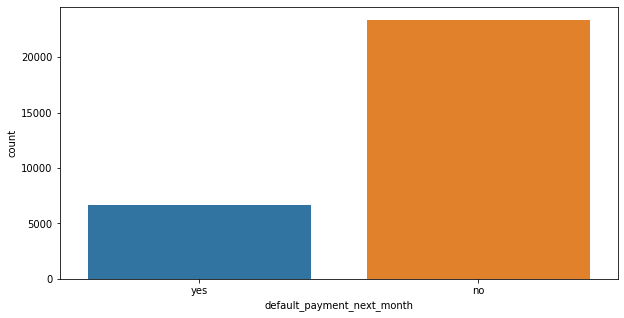

In [250]:
# Plot the graph of defaulter and non defaulter
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = credit_data_df)

Conclusion: From above plot we can conclude that defaulter are less in our dataset.

# Analysis of Independent variable



*   We have few categorical features in our dataset:
*   Sex
*   Education
*   Marriage
*   Age

# **Age**

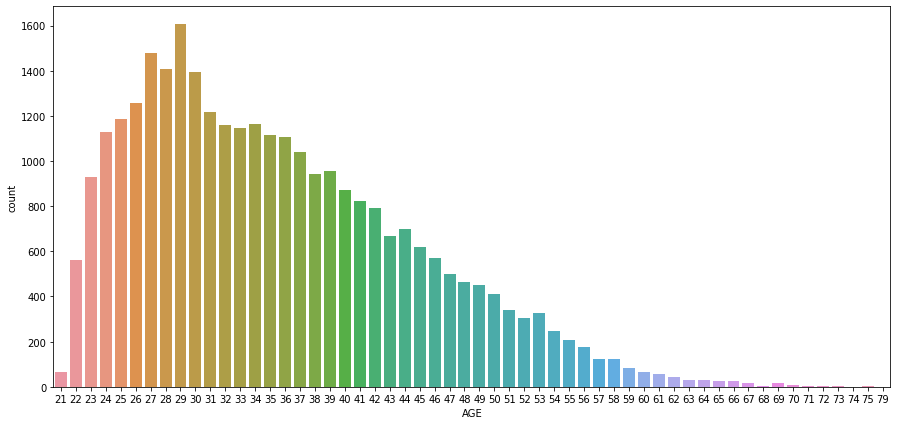

In [251]:
# Plot the graph of number of ages of people with credit card.
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = credit_data_df)

Conclusion: From above plot we can see that people from age 24 to 36 uses more credit card. Above 60 years of age people rarely use credit card.

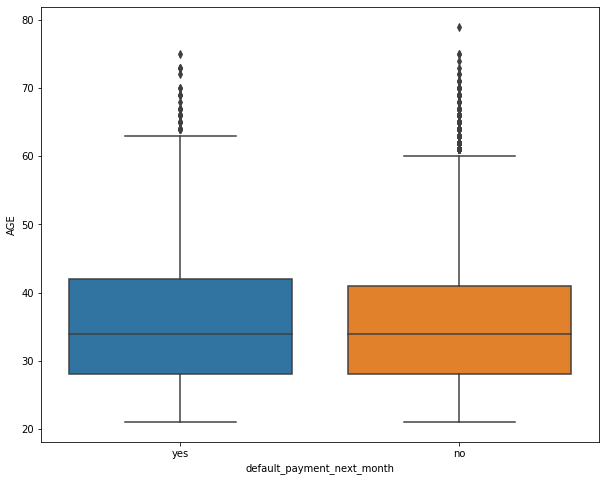

In [252]:
# Plot to check the data distribution
plt.figure(figsize=(10,8))
sns.boxplot(x = 'default_payment_next_month', y = 'AGE', data = credit_data_df)

# **Education**

1 = graduate school; 2 = university; 3 = high school; 0 = others

In [253]:
# Count the education variable in dataset
credit_data_df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
5                    280
others               137
6                     51
Name: EDUCATION, dtype: int64

In [254]:
# Now combine 0,4,5 and 6 to 0 which is 'others' category
credit_data_df['EDUCATION'] = credit_data_df['EDUCATION'].replace({4:0,5:0,6:0})
credit_data_df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
0                    331
others               137
Name: EDUCATION, dtype: int64

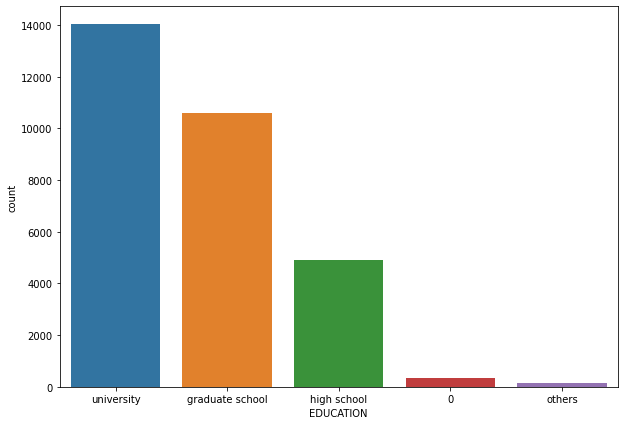

In [255]:
# Plotting the count plot
plt.figure(figsize=(10,7))
sns.countplot(x = 'EDUCATION', data = credit_data_df)

Conclusion: We can conclude by above plot that most number of credit card holders are university students.

# **Marriage**

In [256]:
# Count the variables of marriage
credit_data_df['MARRIAGE'].value_counts()

single     15964
married    13659
others       323
0             54
Name: MARRIAGE, dtype: int64


*   1 = married
*   2 = single
*   3 = others
*   But also there are 54 counts in 0, so we will combine 0 and 3 in other category.





In [257]:
# Combine 0 and 3
credit_data_df['MARRIAGE'] = credit_data_df['MARRIAGE'].replace({0:3})
credit_data_df['MARRIAGE'].value_counts()

single     15964
married    13659
others       323
3             54
Name: MARRIAGE, dtype: int64

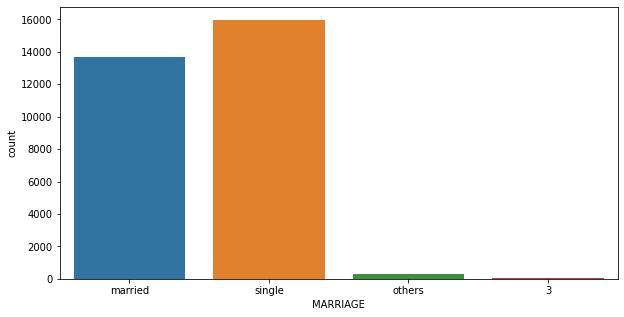

In [258]:
# Plot to view data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = credit_data_df)

Conclusion: From above plot we can see that most number of credit card are hold by people whose status is single.

# **Sex**



*   1: Male
*   2: Female



In [259]:
# Count of variables in dataset.
credit_data_df['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

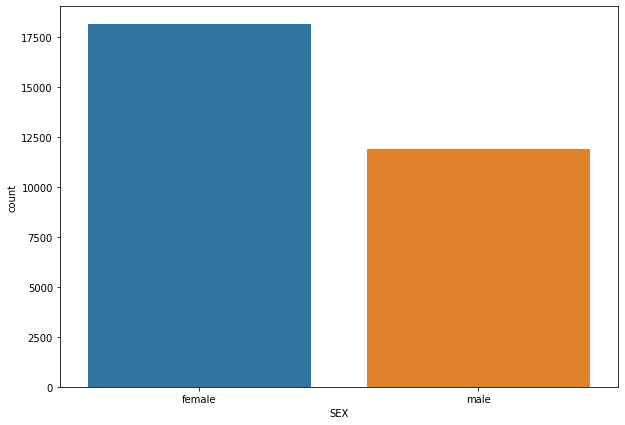

In [260]:
# Plot the graph
plt.figure(figsize=(10,7))
sns.countplot(x = 'SEX', data = credit_data_df)

Conclusion: From above plot we can conclude that number of female credit card holder are more than male.

# **Numerical Features**

Limit Balance

In [263]:
# Limit balance description
credit_data_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

TypeError: ignored

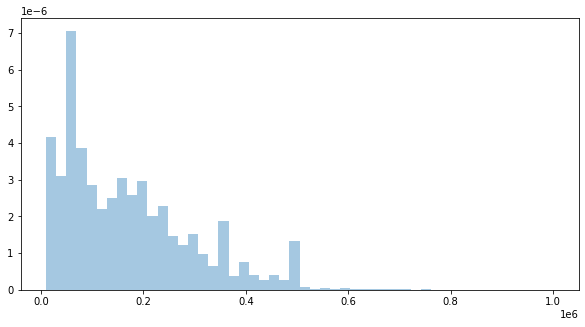

In [264]:
# Plotting distribution plot of Limit Bal.
plt.figure(figsize = (10,5))
sns.distplot(credit_data_df['LIMIT_BAL'], kde = True)

Conclusion: Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000

In [ ]:
# View the data distribution with respect to target variable
sns.barplot(x = 'default_payment_next_month', y = 'LIMIT_BAL', data = credit_data_df)

In [ ]:
# Rename the column for smooth process
credit_data_df.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JULY','PAY_4':'PAY_JUNE','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace = True)
credit_data_df.rename(columns={'BILL_AMT1':'BILL_SEP','BILL_AMT2':'BILL_AUG','BILL_AMT3':'BILL_JULY','BILL_AMT4':'BILL_JUNE',
                               'BILL_AMT5':'BILL_MAY','BILL_AMT6':'BILL_APR'},inplace = True)
credit_data_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEP','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE',
                               'PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace = True)

In [ ]:
# check the information summary of dataset after renaming the column
credit_data_df.info()

Total Bill Amount


*   Pair plot: This function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.



In [ ]:
# Create a single variable for the bill amount and plot the pairplot 
total_bill_amt = credit_data_df[['BILL_SEP','BILL_AUG','BILL_JULY','BILL_JUNE','BILL_MAY','BILL_APR']]
sns.pairplot(data = total_bill_amt)

Previous Amount

In [ ]:
#plotting the count plot for Previous payment
previous_payment = ['PAY_SEP','PAY_AUG','PAY_JULY','PAY_JUNE','PAY_MAY','PAY_APR']
for col in previous_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment_next_month', data = credit_data_df)

Paid Amount

In [ ]:
# Create a single variable and plot pairplot
paid_amt = credit_data_df[['PAY_AMT_SEP','PAY_AMT_AUG','PAY_AMT_JULY','PAY_AMT_JUNE','PAY_AMT_MAY','PAY_AMT_APR','default_payment_next_month']]
sns.pairplot(data = paid_amt, hue = 'default_payment_next_month')

**Bivariate Analysis:** It is one of the most simplest forms of analysis. It involves the analysis of two variable, for the purpose of determining the empirical relationship between them, also it can be helpful inn testing simple  hypothesis of association.

In [ ]:
# Plot to visualize the data distribution between gender and default payment
x,y = 'SEX', 'default_payment_next_month'
(credit_data_df.groupby(x)[y].value_counts(normalize= True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent',hue = y,kind='bar'))

Conclusion: Males have more default payment as compared to females.

In [ ]:
# Plot to visualize the data distribution between marriage and default payment
x,y = 'MARRIAGE', 'default_payment_next_month'
(credit_data_df.groupby(x)[y].value_counts(normalize= True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent',hue = y,kind='bar'))

Conclusion: Default payment in others category are more as compared to married and single.

In [ ]:
# Plot to visualize the data distribution between education and default payment
x,y = 'EDUCATION', 'default_payment_next_month'
(credit_data_df.groupby(x)[y].value_counts(normalize= True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent',hue = y,kind='bar'))

Conclusion: From above plot we can see that high schools people has more default payment than others.

# **Correlation Matrix**

In [ ]:
# Create a dataframe copy
credit_data_df_copy = credit_data_df.copy()

In [ ]:
#credit_data_df.replace({'default_payment_next_month': {'no' : 0, 'yes' : 1}},inplace = True)

In [ ]:
credit_data_df_copy = credit_data_df_copy.replace({'SEX': {'male' : 1, 'female' : 2}, 'EDUCATION' : {'graduate school' : 1, 'university' : 2, 'high school' : 3, 'others' : 4,'others':0},
                        'MARRIAGE' :{'married' : 1 , 'single': 2, 'others': 3},'default_payment_next_month':{'no' : 0, 'yes' : 1}})

In [ ]:
# Heatmap plot for correlation between different variable
plt.figure(figsize=(20,8))
correlation = credit_data_df_copy.corr()
mask = np.triu(np.ones_like(credit_data_df_copy.corr()))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

Conclusion: we can see in above plot that some variable like age are negatively correlated. We can ignore ID as it will not effect the result.

# SMOTE(Synthetic Minority Oversampling Technique): 

*  Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

*   In our dataset we have high imbalanced data distribution in target variable, this happens generally when observation in one of the class are much higher.
*   As machine learning algorithm tends to increase accuracy by reducing error so they do not consider class distribution.
*   ML techniques such as Decision Trees and Logistic Regression is biased towards majority class and tend to ignore minority class.

In [ ]:
# Apply smote to balance the dataset
smote = SMOTE()

In [ ]:
# Fit the target and predictor variable
x_smote,y_smote = smote.fit_resample(credit_data_df_copy.iloc[:,0:-1],credit_data_df_copy['default_payment_next_month'])
print('Original dataset observation',len(credit_data_df_copy))
print('Resampled dataset observation',len(y_smote))

In [ ]:
columns = list(credit_data_df_copy.columns)
columns.pop()

In [ ]:
# Create a variable name for balanced dataframe
balanced_credit_data_df = pd.DataFrame(x_smote, columns=columns)
balanced_credit_data_df['default_payment_next_month'] = y_smote

In [ ]:
# Count plot after applying smote
sns.countplot('default_payment_next_month', data = balanced_credit_data_df)

In [ ]:
balanced_credit_data_df[balanced_credit_data_df['default_payment_next_month']==1]

# Feature Engineering

In [ ]:
# create a variable and copy the balanced dataset
credit_df_copy = balanced_credit_data_df.copy()

In [ ]:
# Assign the sum of payment value in one
credit_df_copy['total_pay_value'] = credit_df_copy['PAY_SEP']+credit_df_copy['PAY_AUG']+credit_df_copy['PAY_JULY']+credit_df_copy['PAY_JUNE']+credit_df_copy['PAY_MAY']+credit_df_copy['PAY_APR']
credit_df_copy['total_pay_value']

In [ ]:
# Check the correlation using mean
credit_df_copy.groupby('default_payment_next_month')['total_pay_value'].mean()

In [ ]:
# View box plot
plt.figure(figsize=(10,7))
sns.boxplot(data = credit_df_copy, x = 'default_payment_next_month', y = 'total_pay_value')

In [ ]:
# Create a column of amount due by summing total bill amount and subtracting it from total amount paid
credit_df_copy['amt_due'] = (credit_df_copy['BILL_SEP']+credit_df_copy['BILL_AUG']+credit_df_copy['BILL_JULY']+credit_df_copy['BILL_JUNE']+credit_df_copy['BILL_MAY']+credit_df_copy['BILL_APR']) - (credit_df_copy['total_pay_value'])

In [ ]:
# Check the correlation by calculating the mean
credit_df_copy.groupby('default_payment_next_month')['amt_due'].mean()

In [ ]:
#  Change the features observation to categorical
credit_df_copy.replace({'SEX': {1 : 'male', 2 : 'female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',0:'others'},
                        'MARRIAGE' :{1 : 'married' , 2: 'single', 3: 'others'}},inplace = True)

In [ ]:
# Final dataset
credit_df_copy.head()

# One Hot Encoding

*   In this method we convert each categorical value into a new categorical column and assign a binary value 0 or 1.

In [ ]:
# Apply one hot encoding
credit_df_copy = pd.get_dummies(credit_df_copy, columns=["MARRIAGE", "EDUCATION"])

In [ ]:
# Apply one hot encoding
credit_df_copy = pd.get_dummies(credit_df_copy, columns=['PAY_SEP','PAY_AUG','PAY_JULY','PAY_JUNE','PAY_MAY','PAY_APR'], drop_first=True)

In [ ]:
#Apply label encoding on sex column
credit_df_copy['SEX'] = credit_df_copy['SEX'].apply(lambda x:1 if x == 'male' else 0)

In [ ]:
# Drop ID column
#credit_df_copy.drop('ID',axis = 1, inplace = True)

In [ ]:
credit_df_copy.drop('ID', axis='columns', inplace=True)

In [ ]:
# View the name of the column
credit_df_copy.columns

In [ ]:
# Check the shape of dataset after applying one hot encoding
credit_df_copy.shape

In [ ]:
credit_df_copy.head()

# **Modelling**

**Performance Metrics**

*   Precision is a good metric to use when the costs of false positive(FP) is high.
*   Precision = TP / (TP + FP)
*   Recall is a good metric to use when the cost associated with false negative(FN) is high.
*   Recall = TP / (TP + FN)
*  F1-score is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.
*   F1-score = 2 (precision recall) / (precision + recall)

In this classification problem there is high cost for bank when a default credit card is predicted as non defaulter. So we will give more importance to recall.

# **Logistic Regression Implementation**

In [ ]:
# create a copy of dataset
credit_df_logistic = credit_df_copy.copy()

# Train - Test Split 

In [ ]:
# Assign x and y value
X = credit_df_logistic.drop(['default_payment_next_month','total_pay_value','amt_due'],axis=1)
y = credit_df_logistic['default_payment_next_month'] 

In [ ]:
columns = X.columns

In [ ]:
# Apply standardscalar to standardise x value
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=42, stratify=y)

# Hyperparameter tuning using GridSearchCV

In [ ]:
# Set the parameter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
# Fit the parameter
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

In [ ]:
optimized_clf_result = grid_lr_clf.best_estimator_
grid_lr_clf.best_estimator_

In [ ]:
grid_lr_clf.best_score_

In [ ]:
# Predicted probability
train_pred = optimized_clf_result.predict_proba(X_train)[:,1]
test_pred = optimized_clf_result.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_pred = optimized_clf_result.predict(X_train)
test_class_pred = optimized_clf_result.predict(X_test)

# **Model Evaluation**

In [ ]:
# Get the accuracy score
train_accuracy_logistic = accuracy_score(train_class_pred,y_train)
test_accuracy_logistic = accuracy_score(test_class_pred,y_test)
print('The accuracy on train data is', train_accuracy_logistic)
print('The accuracy on test data is', test_accuracy_logistic)

In [ ]:
# Get the accuracy, precision, recall, f1score, roc_score
test_accuracy_logistic = accuracy_score(test_class_pred,y_test)
test_precision_logistic = precision_score(test_class_pred,y_test)
test_recall_logistic = recall_score(test_class_pred,y_test)
test_f1_logistic = f1_score(test_class_pred,y_test)
test_roc_logistic = roc_auc_score(test_class_pred,y_test)

print('The accuracy on test data is',test_accuracy_logistic)
print('The precision on test data is',test_precision_logistic)
print('The recall on test data is',test_recall_logistic)
print('The f1 score on test data is',test_f1_logistic)
print('The roc score on test data is',test_roc_logistic)

**Note**: We have implemented logistic regression and we getting f1_sore approx 73%. As we have imbalanced dataset, F1- score is better parameter.

# Confusion Matrix

Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.



In [ ]:
# Get the confusion matrix for train and test data
cnf_matrix_logistic = confusion_matrix(y_train, train_class_pred)
print(cnf_matrix_logistic)

In [ ]:
# Plot confusion matrix
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cnf_matrix_logistic, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Features:** Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [ ]:
# Create a varaiable and assign features and importance
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf_result.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [ ]:
# Plot the important features
plt.bar(height=feature_importance['Importance'],x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title('Feature importance via coefficients')
plt.show()

**Conclusion**: From above plot we can see that PAY_MAY_1, PAY_APR_1 and PAY_JUNE_1 are the most important feature that make impact on dependent variable.

# **ROC AUC Curve**

*   An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
*   True Positive Rate

*   False Positive Rate
*   AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve





In [ ]:
# Assign the variable
y_pred_proba_logistic = optimized_clf_result.predict_proba(X_test)[::,1]

In [ ]:
# Plot the curve
y_pred_proba = y_pred_proba_logistic
fpr,tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label= 'data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

# **XGBoost Implementation**

*   The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.




In [ ]:
# The data is stored in Dmatrix object and label is used to define our outcome variable
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test)

In [ ]:
# Set the parameter for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [ ]:
# Model Training
num_round = 50
start = datetime.now()
xg= xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

In [ ]:
# Model execution time
execution_time_xgb = stop-start
execution_time_xgb

In [ ]:
# Predicting our model on train set
train_class_pred_probs = xg.predict(dtrain)

In [ ]:
# Predicting our model on test set
test_class_pred_probs = xg.predict(dtest)
len(train_class_pred_probs)

In [ ]:
train_class_pred = []
test_class_pred = []
for i in range(0,len(train_class_pred_probs)):
  if train_class_pred_probs[i] >= 0.5:
    train_class_pred.append(1)
  else:
    train_class_pred.append(0)

for i in range(0,len(test_class_pred_probs)):
  if test_class_pred_probs[i] >= 0.5:
    test_class_pred.append(1)
  else:
    test_class_pred.append(0)

In [ ]:
test_class_pred_probs[:20]

In [ ]:
test_class_pred[:20]

In [ ]:
len(y_train)

In [ ]:
len(train_class_pred)

**Model Evaluation**

In [ ]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_pred,y_train)
test_accuracy_xgb = accuracy_score(test_class_pred,y_test)

print('The accuracy on train data is ', train_accuracy_xgb)
print('The accuracy on test data is ', test_accuracy_xgb)

In [ ]:
# Get the accuracy, precision, recall, f1score, roc_score
test_accuracy_xgb = accuracy_score(test_class_pred,y_test)
test_precision_xgb = precision_score(test_class_pred,y_test)
test_recall_xgb = recall_score(test_class_pred,y_test)
test_f1_xgb = f1_score(test_class_pred,y_test)
test_roc_xgb = roc_auc_score(test_class_pred,y_test)

print('The accuracy on test data is', test_accuracy_xgb)
print('The precision on test data is', test_precision_xgb)
print('The recall on test data is', test_recall_xgb)
print('The f1 score on test data is', test_f1_xgb)
print('The roc score on test data is', test_roc_xgb)

**Confusion Matrix**

In [ ]:
# Get the confusion matrix for train and test data
cnf_matrix_xg = confusion_matrix(y_train, train_class_pred)
print(cnf_matrix_xg)

In [ ]:
# Plot confusion matrix
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cnf_matrix_xg, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Hyperparameter Tuning**

*   Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.

*   We can leverage the maximum power of XGBoost by tuning its hyperparameters.


In [ ]:
# Define the x and y value
X = credit_df_copy.drop(['default_payment_next_month','total_pay_value','amt_due'],axis=1)
y = credit_df_copy['default_payment_next_month']

In [ ]:
# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140,max_depth=5,
                                                min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
                                                objective = 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
                        param_grid=param_test1,scoring='accuracy',n_jobs=-1,cv=3,verbose=2)
gsearch1.fit(X_train,y_train)

In [ ]:
 # Get the best score
 gsearch1.best_score_

In [ ]:
# Get the best estimator
optimal_xgb_result = gsearch1.best_estimator_

In [ ]:
# Get the predicted class
train_class_pred = optimal_xgb_result.predict(X_train)
test_class_pred = optimal_xgb_result.predict(X_test)

In [ ]:
# Get the accuracy score after hyperparameter tuning
train_accuracy_xgb_tuned = accuracy_score(train_class_pred,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_pred,y_test)

print('The accuracy score on train data after hyperparameter tuning is ', train_accuracy_xgb_tuned)
print('The accuracy score on test data after hyperparameter tuning is', test_accuracy_xgb_tuned)

In [ ]:
# Get the accuracy, precision, recall, f1score, roc_score after tuning
test_accuracy_xgb_tuned = accuracy_score(test_class_pred,y_test)
test_precision_xgb_tuned = precision_score(test_class_pred,y_test)
test_recall_xgb_tuned = recall_score(test_class_pred,y_test)
test_f1_xgb_tuned = f1_score(test_class_pred,y_test)
test_roc_xgb_tuned = roc_auc_score(test_class_pred,y_test)

print('The accuracy on test data after hyperparameter tuning is ', test_accuracy_xgb_tuned)
print('The Precision on test data after hyperparameter tuning is ', test_precision_xgb_tuned)
print('The recall on test data after hyperparameter tuning is ', test_recall_xgb_tuned)
print('The f1 score on test data after hyperparameter tuning is ', test_f1_xgb_tuned)
print('The roc score on test data after hyperparameter tuning is ', test_roc_xgb_tuned)

In [ ]:
# Store the values of feature in dataframe and sort them
pd.DataFrame(optimal_xgb_result.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

In [ ]:
# Create the variable and plot the bar graph for feature importance

feature_importance_xgb = pd.DataFrame(optimal_xgb_result.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importance_xgb.index, feature_importance_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importance_xgb.index, rotation = 85)
plt.show()

Conclusion: From above plot we can say that most important feature is PAY_AUG_1 that effect the target variable.

# **ROC AUC Curve**

In [ ]:
# Assign the variable
y_pred_proba_xgb = optimal_xgb_result.predict_proba(X_test)[::,1]

In [ ]:
# Plot the curve
y_pred_proba = y_pred_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **RandomForest Implementation**

In [ ]:
# Assign the x and y value
X = credit_df_copy.drop(['default_payment_next_month', 'total_pay_value', 'amt_due'], axis = 1)
y = credit_df_copy['default_payment_next_month']

In [ ]:
# Apply and fit the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

In [ ]:
# Get the predicted classes
train_class_pred = rf_clf.predict(X_train)
test_class_pred = rf_clf.predict(X_test)

# Model Evaluation

In [ ]:
# Get the accuracy score
train_accuracy_rf = accuracy_score(train_class_pred, y_train)
test_accuracy_rf = accuracy_score(test_class_pred, y_test)

print('The accuracy score on train data is ', train_accuracy_rf)
print('The accuracy score on test data is ', test_accuracy_rf)

In [ ]:
# Get the accuracy, precision, recall, f1score, roc_score
test_accuracy_rf = accuracy_score(test_class_pred, y_test)
test_precision_rf = precision_score(test_class_pred, y_test)
test_recall_rf = recall_score(test_class_pred, y_test)
test_f1_rf = f1_score(test_class_pred, y_test)
test_roc_rf = roc_auc_score(test_class_pred, y_test)

print('The accuracy on test data is ', test_accuracy_rf)
print('The precision on test data is ', test_precision_rf)
print('The recall on test data is ', test_recall_rf)
print('The f1 score on test data is ', test_f1_rf)
print('The roc score on test data is ', test_roc_rf)

Conclusion: We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting.

**Hyperparameter Tuning**

In [ ]:
# Set the parameter
param_grid = {'n_estimators': [150,200,250], 'max_depth':[20,40,60]}

In [ ]:
# Fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(),param_grid, scoring='accuracy', n_jobs=-1, verbose = 3, cv = 5)
grid_rf_clf.fit(X_train,y_train)

In [ ]:
# Check the best score
grid_rf_clf.best_score_

In [ ]:
# Check the best parameter
grid_rf_clf.best_params_

In [ ]:
# create a variable for best estimator
optimal_rf_result = grid_rf_clf.best_estimator_

In [ ]:
# Get the predicted class
train_class_pred = optimal_rf_result.predict(X_train)
test_class_pred = optimal_rf_result.predict(X_test)

In [ ]:
# Get the accuracy score on train and test data
train_accuracy_rf_tuned = accuracy_score(train_class_pred,y_train)
test_accuracy_rf_tuned = accuracy_score(test_class_pred,y_test)

print('The accuracy score on train data after hyperparameter tuning is ', train_accuracy_rf_tuned)
print('The accuracy score on test data after hyperparameter tuning is ', test_accuracy_rf_tuned)

In [ ]:
# Get the accuracy, precision, recall, f1score, roc_score after hyperparameter tuning
test_accuracy_rf_tuned = accuracy_score(test_class_pred,y_test)
test_precision_rf_tuned = precision_score(test_class_pred,y_test)
test_recall_rf_tuned = recall_score(test_class_pred,y_test)
test_f1_rf_tuned = f1_score(test_class_pred,y_test)
test_roc_rf_tuned = roc_auc_score(test_class_pred,y_test)

print('The accuracy after hyperparameter tuning is', test_accuracy_rf_tuned)
print('The precision after hyperparameter tuning is ', test_precision_rf_tuned)
print('The recall after hyperparameter tuning is ', test_recall_rf_tuned)
print('The f1 score after hyperparameter tuning is ', test_f1_rf_tuned)
print('The roc score after hyperparameter tuning is ', test_roc_rf_tuned)


**Confusion Matrix**

In [ ]:
# Get the confusion matrix from both the train and test data
cnf_matrix_rf = confusion_matrix(y_train, train_class_pred)
print(cnf_matrix_rf)

In [ ]:
# Plot confusion matrix
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cnf_matrix_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Feature Importance**

In [ ]:
# Store the values of feature in dataframe and plot the graph for top 10 feature importance
feature_importance_rf = pd.DataFrame(optimal_rf_result.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importance_rf.index, feature_importance_rf['importance_rf'],
        color="b",  align="center")
plt.xticks(feature_importance_rf.index, rotation = 85)
plt.show()

Conclusion: From the above feature importance graph we can say that the most important feature that make an impact on dependt variable are LIMIT_BAL and PAY_SEP.

**ROC AUC Curve**

In [ ]:
# Get the predicted class
train_class_pred = optimal_rf_result.predict(X_train)
test_class_pred = optimal_rf_result.predict(X_test)
#Assign the variable
y_pred_proba_rf = optimal_rf_result.predict_proba(X_test)[::,1]

In [ ]:
# Plot the curve
y_pred_proba = y_pred_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Support Vector Classifier(SVC) Implementation**

*   The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function.


In [ ]:
# Create the copy of dataset
credit_df_svc = credit_df_copy.copy()

In [ ]:
# Create the parameters
param_grid_svc = {'C':[5],'kernel':['rbf']} 

In [ ]:
# Standardise the dataset
scaler_svc = StandardScaler()
X = scaler_svc.fit_transform(X)

In [ ]:
# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify= y)

In [ ]:
# Set the parameter and fit the model
grid_svc_clf = GridSearchCV(SVC(probability=True),param_grid_svc,scoring='accuracy',n_jobs= -1, verbose = 3, cv= 2)
grid_svc_clf.fit(X_train, y_train)

In [ ]:
# Get the best parameters
grid_svc_clf.best_params_

In [ ]:
# Get the best score
grid_svc_clf.best_score_

In [ ]:
# Get the best estimator
optimal_svc_result = grid_svc_clf.best_estimator_
optimal_svc_result

Model Evaluation

In [ ]:
# Get the predicted class
train_class_pred_svc = optimal_svc_result.predict(X_train)
test_class_pred_svc = optimal_svc_result.predict(X_test)

In [ ]:
# Get the accuracy score
train_accuracy_svc = accuracy_score(train_class_pred_svc,y_train)
test_accuracy_svc = accuracy_score(test_class_pred_svc,y_test)

print('The accuracy on train data is ', train_accuracy_svc)
print('The accuracy on train data is ', test_accuracy_svc)

In [ ]:
# # Get the accuracy, precision, recall, f1score, roc_score after hyperparameter tuning
test_accuracy_svc = accuracy_score(test_class_pred_svc,y_test)
test_precision_svc = precision_score(test_class_pred_svc,y_test)
test_recall_svc = recall_score(test_class_pred_svc,y_test)
test_f1_svc = f1_score(test_class_pred_svc,y_test)
test_roc_svc = roc_auc_score(test_class_pred_svc,y_test)

print('The accuracy score on test data is ', test_accuracy_svc)
print('The precision score on test data is ', test_precision_svc)
print('The recall on test data is', test_recall_svc)
print("The f1 score on test data is ", test_f1_svc)
print('The roc score on tes data is ', test_roc_svc)

**Confusion Matrix**

In [ ]:
# Get the confusion matrix for train and test data
labels = ['Not Defaulter', 'Defaulter']
cnf_matrix_svc = confusion_matrix(y_train, train_class_pred_svc)
print(cnf_matrix_svc)

ax= plt.subplot()
sns.heatmap(cnf_matrix_svc, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**ROC AUC Curve**

In [ ]:
# Get the predicted class
train_class_pred_svc = optimal_svc_result.predict(X_train)
test_class_pred_svc = optimal_svc_result.predict(X_test)

In [ ]:
# Create the variable
y_pred_proba_svc = optimal_svc_result.predict_proba(X_test)[::,1]

In [ ]:
# Plot the curve
fpr,tpr, _ = roc_curve(y_test,y_pred_proba_svc)
auc = roc_auc_score(y_test, y_pred_proba_svc)
plt.plot(fpr,tpr,label='data 1, auc ='+str(auc))
plt.legend(loc=4)
plt.show()

# **Evaluating all the models**

In [ ]:
recall_score

In [ ]:
# Create a table for comparison of all the scores from all the models
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLF', 'Xgboost CLF']
overall_train_accuracy = [train_accuracy_logistic, train_accuracy_xgb_tuned, train_accuracy_rf_tuned, train_accuracy_svc]
overall_test_accuracy = [test_accuracy_logistic, test_accuracy_xgb_tuned, test_accuracy_rf_tuned, test_accuracy_svc ]
overall_precision_score = [test_precision_logistic, test_precision_xgb_tuned, test_precision_rf_tuned, test_precision_svc]
overall_recall_score = [test_recall_logistic, test_recall_xgb_tuned, test_recall_rf_tuned, test_recall_svc]
overall_f1_score = [test_f1_logistic, test_f1_xgb_tuned, test_f1_rf_tuned, test_f1_svc]

In [ ]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy':overall_train_accuracy, 'Test Accuracy':overall_test_accuracy, 'Precision Score':overall_precision_score, 'Recall Score':overall_recall_score, 'F1 Score':overall_f1_score})